In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Show the first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### data has 31 column if we apply normal algorithm on it, it will take a lot of time to train the model. So we will use PCA to reduce the number of columns.

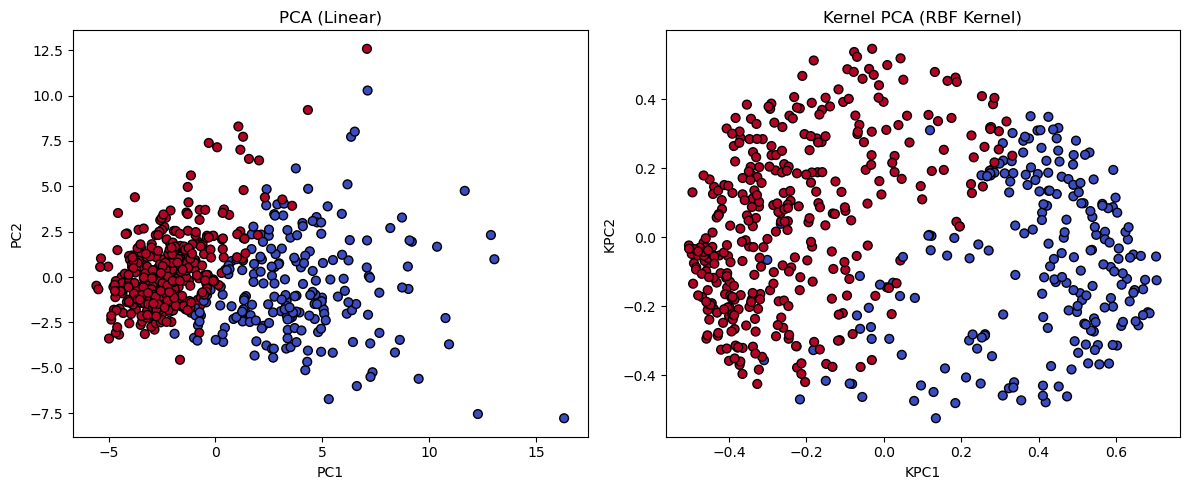

In [12]:

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (Linear)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Kernel PCA (with RBF Kernel)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kpca = kpca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('PCA (Linear)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot Kernel PCA
plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('Kernel PCA (RBF Kernel)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')

plt.tight_layout()
plt.show()


PCA Reduced Data:
        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0

Kernel PCA Reduced Data:
       KPC1      KPC2  target
0  0.397854  0.182639       0
1  0.411138 -0.430391       0
2  0.704703 -0.125100       0
3  0.281110  0.196500       0
4  0.506986 -0.162451       0


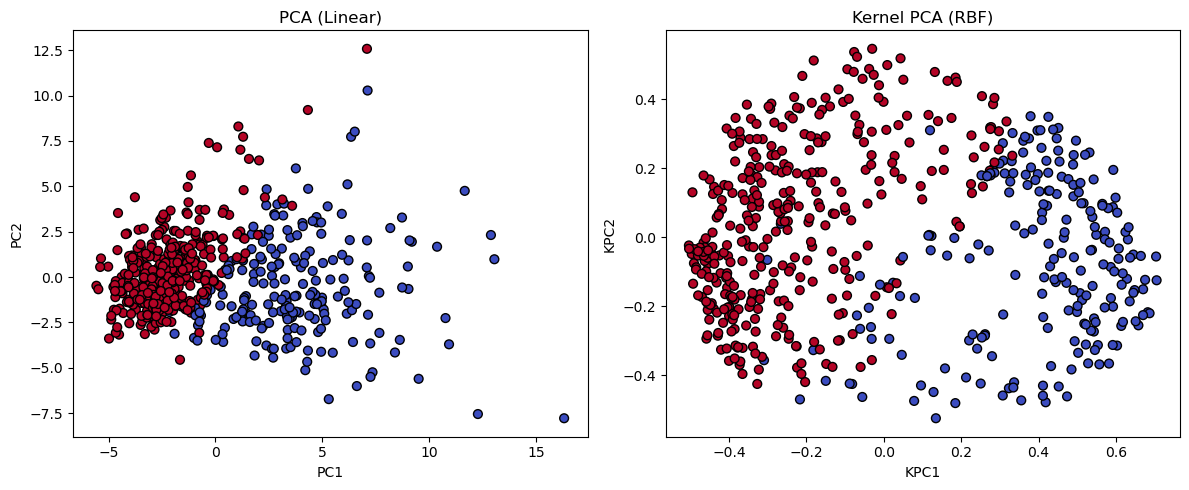

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

# Load and scale data
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Apply Kernel PCA (RBF)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kpca = kpca.fit_transform(X_scaled)
kpca_df = pd.DataFrame(X_kpca, columns=['KPC1', 'KPC2'])
kpca_df['target'] = y

# Display head of both DataFrames
print("PCA Reduced Data:")
print(pca_df.head())

print("\nKernel PCA Reduced Data:")
print(kpca_df.head())

# Plot comparison
plt.figure(figsize=(12, 5))

# PCA plot
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('PCA (Linear)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# KPCA plot
plt.subplot(1, 2, 2)
plt.scatter(kpca_df['KPC1'], kpca_df['KPC2'], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('Kernel PCA (RBF)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')

plt.tight_layout()
plt.show()


In [15]:
# Define RBF kernel
def rbf_kernel(x, y, gamma=0.03):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def kernel_pca_train(x, k):
    n = x.shape[0]
    K = np.zeros((n, n))
    S = np.zeros(n)
    T = np.zeros(n)

    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i, :], x[j, :])

    for i in range(n):
        S[i] = np.sum(K[i, :])
    for j in range(n):
        T[j] = np.sum(K[:, j])
    U = np.sum(K)

    for i in range(n):
        for j in range(n):
            K[i, j] = K[i, j] - S[i]/n - T[j]/n + U/(n**2)

    val, vec = np.linalg.eigh(K)
    idx = np.argsort(val)[::-1]
    val = val[idx]
    vec = vec[:, idx]

    alpha = np.zeros((n, n))
    for i in range(n):
        if val[i] > 1e-10:
            alpha[:, i] = vec[:, i] / np.sqrt(val[i])

    return alpha


PCA Reduced Data:
        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0

Kernel PCA Reduced Data:
       KPC1      KPC2  target
0 -0.005302  0.005518       0
1 -0.005479 -0.013003       0
2 -0.009391 -0.003780       0
3 -0.003746  0.005937       0
4 -0.006756 -0.004908       0


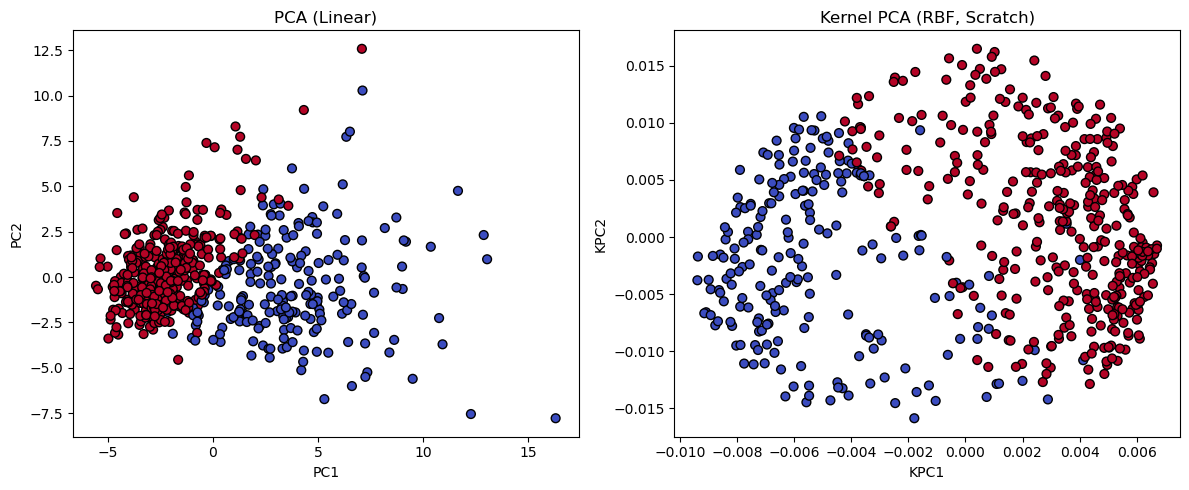

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define RBF kernel
def rbf_kernel(x, y, gamma=0.03):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

# Kernel PCA from scratch
def kernel_pca_train(x, k):
    n = x.shape[0]
    K = np.zeros((n, n))
    S = np.zeros(n)
    T = np.zeros(n)

    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i, :], x[j, :])

    for i in range(n):
        S[i] = np.sum(K[i, :])
    for j in range(n):
        T[j] = np.sum(K[:, j])
    U = np.sum(K)

    for i in range(n):
        for j in range(n):
            K[i, j] = K[i, j] - S[i]/n - T[j]/n + U/(n**2)

    val, vec = np.linalg.eigh(K)
    idx = np.argsort(val)[::-1]
    val = val[idx]
    vec = vec[:, idx]

    alpha = np.zeros((n, n))
    for i in range(n):
        if val[i] > 1e-10:
            alpha[:, i] = vec[:, i] / np.sqrt(val[i])

    return alpha[:, :2]  # return only first 2 components

# Load and scale data
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA using sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Kernel PCA using scratch
X_kpca = kernel_pca_train(X_scaled, lambda a, b: rbf_kernel(a, b, gamma=0.03))
kpca_df = pd.DataFrame(X_kpca, columns=['KPC1', 'KPC2'])
kpca_df['target'] = y

# Display head of both DataFrames
print("PCA Reduced Data:")
print(pca_df.head())

print("\nKernel PCA Reduced Data:")
print(kpca_df.head())

# Plot comparison
plt.figure(figsize=(12, 5))

# PCA plot
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('PCA (Linear)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# KPCA plot
plt.subplot(1, 2, 2)
plt.scatter(kpca_df['KPC1'], kpca_df['KPC2'], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('Kernel PCA (RBF, Scratch)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')

plt.tight_layout()
plt.show()
